In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path

***coding a neural network with keras***


In [2]:
model = keras.models.Sequential()
model.add(Dense(3, input_dim = 2, activation = 'relu')) # you have to define the input_dim in the first layer
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1)) # the output layer

model.compile(optimizer = 'adam', loss = 'mse') 
#optimizer algorisim is used to train the nn
#the loss function misures how right or wrong the nn's predection are

AND NOW, TO THE IMAGE RECOGNITION..

# Dealing with the data of CIFAR10

In [3]:
#list of names for each cifar10 class
cifar10_class_names = {0: "Plane",
                       1: "Car",
                       2: "Bird",
                       3: "Cat",
                       4: "Deer",
                       5: "Dog",
                       6: "Frog",
                       7: "Horse",
                       8: "Boat",
                       9: "Truck"}

#load the entire dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #the function returns 2 tuples

170508288/170498071 [==============================] - 11s 0us/step


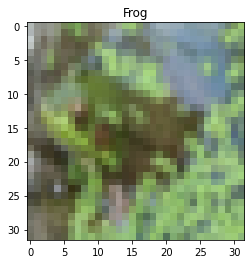

In [4]:
i = np.random.randint(1000)

sample_image = x_train[i] #grap a random image
sample_image_class_num = y_train[i][0] #grap its class number
  
#get the name of the class by using the dictionary we created
sample_image_class_name = cifar10_class_names[sample_image_class_num]

#draw some cool stuff
plt.imshow(sample_image)
plt.title(sample_image_class_name)
plt.show()

In [5]:
# Nromalize the DataSet to 0-1 range
x_train = x_train.astype('float32')
x_train /= 255.0

x_test = x_test.astype('float32')
x_test /= 255.0



```
considering the y... the Neural Network will have 10 nodes as outputs,
so we need a seperate expected value for each output that fits 

So we need to convert each label from a single element to an array with 10 elements!
```



In [6]:
#keras has a very useful function for this
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10) #as there are 10 nodes
y_test = to_categorical(y_test, 10)


y_train[6] #now it's very much cooler >>> [0,0,0,0,0,0,0,1,0,0]
print(x_train.shape[1]) # a single image's shape for the ' input shape'

32


# **Now the data is very ready to the Neural Network**

In [7]:
#create the model and add the layers [Dense Layer]
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape =(32,32,3)))
model.add(Dense(10, activation = 'softmax'))

#print a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32, 32, 512)       2048      
_________________________________________________________________
dense_4 (Dense)              (None, 32, 32, 10)        5130      
Total params: 7,178
Trainable params: 7,178
Non-trainable params: 0
_________________________________________________________________


A common choice for 'activation' image recognition is to use 'relu' as the activation function
the standard choice for wrking with images 'cuz it works well and it's computationally efficient

When doing classification with more than one kind of object,
the output layer will almost use a 'softmax' as an activation function of the output layer

SOFTMAX : special function that make sure all the output values in this layer add up to exact one
as each output is a value that represents the percent likelihood that a certain type of object is detected and all 10 values should add up to 100% or 1 

In [8]:
#create the model and add the layers [Convolution Layers]

model = Sequential()

#When working with emages, use 2D, for some kind of data like sound-waves you can use 1D
#32 felters, each one for detecting one pattern
#(3,3) the small window size ,adding padding is optional

model.add(Conv2D(32, (3,3), padding = 'same' ,activation= 'relu', input_shape =(32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu')) # we wont pad the images 

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu'))

#tell keras, you no longer working with 2D data
model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

#print a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               25690624  
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

Max pooling, is where we scale down the output of the convolutional layers to keeping only the larger value and trhowing away the lower ones.

This makes the neural network more efficient by throwing away the lest useful data!
we do maz pooling after a block of convolutional layer

In [9]:
#create the model and add the layers [Max pooling]

model = Sequential()

model.add(Conv2D(32, (3,3), padding = 'same' ,activation= 'relu', input_shape =(32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu')) # we wont pad the images 
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


#print a summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

**Notice that after MaxPooling the Params decreased!, so it will take less time and basically more efficint!**

One more trick to make the Neural Network perform better, is adding a dropout layers.
One of the problems of Neural Networks is that they tend to memorize the training data instead of actually learning how to tell differernt objects apart.
we can force the Neural Network to try harder to learn without memorization, 
the idea is  that between certain layers we randomly throw away some of the data by cutting some of the connections between the layers.
-This Is Called Dropout
we usually add it after a group of dense layers
or right after MaxPooling layers

In [10]:
#create the model and add the layers [Dropout]

model = Sequential()

model.add(Conv2D(32, (3,3), padding = 'same' ,activation= 'relu', input_shape =(32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu')) # we wont pad the images 
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25)) #0.25 to 0.50 works well

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.50)) #make it suffer to learn

model.add(Dense(10, activation = 'softmax'))


#print a summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)         

**Our cool Neural Network is Done and ready :D**

# Compiling, training, and testing

when we compile the Neural Network we tell keras we actually wanna create the Neural Network in the memory, and how we'll be training it and measuring its accuracy.

**considering the loss function:**

  if you trying to classify and image into different categories use 'categorical_crossentropy'


  if you're only checking if the image belongs to one category, use 'binary_crossentropy'

**considering the optimization algorithm:**
  use 'adam'

**tell keras what metrics we wanna report, for this use ['accuracy']**

In [11]:
#Compile the Neural Network
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


**The "batch_size"** is how many emages we wanna feed into the network at once during training. If we set it too low, trining will take so long and i might never finish. If we set the number too high, we'll ran out of memory of out computer.

**Typical batch size is between 32 and 128 images**

**epochs** are how many time we wanna go through the entire dataset during the training process


***and please please please please... save the training to a variable in order not to lose all your training***

CAUTION: before training the data, I'm creating a validation data seperated from the test set

In [16]:
x_validate = x_test[:7000]
y_validate = y_test[:7000]

x_test = x_test[7000:]
y_test = y_test[7000:]

3000

In [17]:
#Start the Training Process

history = model.fit(x_train, y_train, batch_size = 320, epochs = 30, validation_data = (x_validate, y_validate))


#Saving the structure of the neural network itself
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

#Saving the weights of the Neural Network
model.save_weights('model_weights.h5')


Epoch 1/30
157/157 [==============================] - 213s 1s/step - loss: 1.1002 - accuracy: 0.6111 - val_loss: 0.9839 - val_accuracy: 0.6543
Epoch 2/30
157/157 [==============================] - 213s 1s/step - loss: 0.9909 - accuracy: 0.6498 - val_loss: 0.9275 - val_accuracy: 0.6731
Epoch 3/30
157/157 [==============================] - 213s 1s/step - loss: 0.9183 - accuracy: 0.6769 - val_loss: 0.8265 - val_accuracy: 0.7119
Epoch 4/30
157/157 [==============================] - 213s 1s/step - loss: 0.8597 - accuracy: 0.6986 - val_loss: 0.8103 - val_accuracy: 0.7137
Epoch 5/30
157/157 [==============================] - 212s 1s/step - loss: 0.8020 - accuracy: 0.7186 - val_loss: 0.7630 - val_accuracy: 0.7297
Epoch 6/30
157/157 [==============================] - 211s 1s/step - loss: 0.7652 - accuracy: 0.7306 - val_loss: 0.7206 - val_accuracy: 0.7496
Epoch 7/30
157/157 [==============================] - 211s 1s/step - loss: 0.7194 - accuracy: 0.7476 - val_loss: 0.6937 - val_accuracy: 0.7604

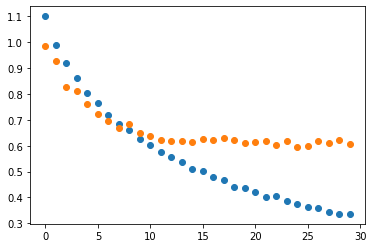

In [18]:
import matplotlib.pyplot as plt

plt.scatter(history.epoch, history.history["loss"])
plt.scatter(history.epoch, history.history["val_loss"])

In [21]:
score = model.evaluate(x_test, y_test, verbose = 1)
print('Test accuracy:', score[1]) 


94/94 [==============================] - 3s 36ms/step - loss: 0.6068 - accuracy: 0.7977
Test accuracy: 0.7976666688919067


In [22]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


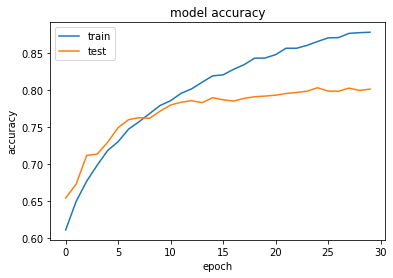

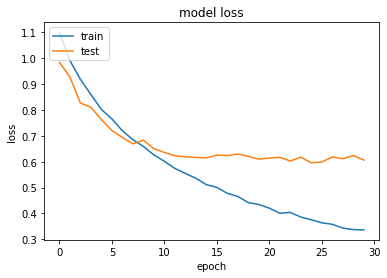

In [23]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()